### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

In [2]:
filename = 'apps_permission.csv'

### Function do find the max size of columns

In [5]:
#preprocessing
def get_max_len():
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        num = []
        for i, row in enumerate(reader):
            num.append(len(row))
        m = max(num)
        #print (m)
        return m
    
print(get_max_len())

126
126


### Read and show dataset

In [6]:
df = pd.read_csv(filename, header=None, na_values=0, names=range(get_max_len()), low_memory=False)

126


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,idteam.app.crazypianofree,android.permission.ACCESS_NETWORK_STATE,android.permission.INTERNET,android.permission.MODIFY_AUDIO_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.READ_PHONE_STATE,android.permission.WRITE_EXTERNAL_STORAGE,android.permission.WRITE_INTERNAL_STORAGE,com.android.launcher.permission.INSTALL_SHORTCUT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,com.extremeenjoy.deutschnews,android.permission.ACCESS_NETWORK_STATE,android.permission.INTERNET,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.VIBRATE,android.permission.WAKE_LOCK,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,com.extremeenjoy.news.kannadacinema,android.permission.ACCESS_NETWORK_STATE,android.permission.INTERNET,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.VIBRATE,android.permission.WAKE_LOCK,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,com.vivek.batteryfloater,android.permission.READ_EXTERNAL_STORAGE,android.permission.READ_PHONE_STATE,android.permission.SYSTEM_ALERT_WINDOW,android.permission.WRITE_EXTERNAL_STORAGE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,coolcherrytrees.games.reactor4,android.permission.INTERNET,android.permission.WAKE_LOCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filter Dataset

In [8]:
permissions = set()
permissions_list = set()
apps_list = set()


for index, row in df.iterrows():
    app = row[0]
    
    for perm in row[1:]:
        if str(perm) == 'nan':
            break
        else:
            perm_list = perm.split('.')
            if 'permission' in perm_list:
                perm_t = perm_list[-1].lower()
                
                if 'token' not in perm_t and len(perm_t) > 0:
                    permissions.add(perm_t)
                    permissions_list.add((app, perm_t))
                    apps_list.add(app)

In [12]:
permissions

{'access_wifi_state_state',
 'control_plugin',
 'action_usb_permission',
 'manage_network_policy',
 'read_log',
 'set_debug_app',
 'media_content_control',
 'rs_graphics',
 'delete_external_storage',
 'access_wifi_network_state',
 'media_scanner_scan_file',
 'enterprise_device_admin',
 'interact_across_users_full',
 'access_internet',
 'getfzudid',
 'lock_unlock',
 'sync',
 'amazon_account_property',
 'camera_extended',
 'nfcee_admin',
 'camera2',
 'remote_lock_service',
 'message',
 'access_print_folder',
 'ynp_message',
 'lghidden',
 'dataset_changed',
 'action_log_out',
 'ubiinfo',
 'network_state_changed_action',
 'mount_unmount_filesystems',
 'broadcast_sms',
 'cross_process_broadcast_manager',
 'create_media_projection',
 'fullscreen',
 'flag_keep_screen_on',
 'add_system_service',
 'read_scenes',
 'read_memo',
 'broadcast_package_remove',
 'abt_service_interop',
 'access_checkin_state',
 'delete_packages',
 'modify_web_settings',
 'uses_policy_force_lock',
 'call_phone_privilege

### Create new dataframe from filter permissions and apps

In [9]:
df_apps = pd.DataFrame(list(permissions_list))
df_apps.head()

,0,1
0,com.automotiontv.crowleykia,internet
1,haussteuerung.dhs.pack,internet
2,com.leprechaun.imagenesconfrasesdebuenosdias,receive_boot_completed
3,jp.colopl.dinous,get_accounts
4,pl.com.continuum.cbtbasicemotionsdiary,access_network_state


### Create a matrix from dataframe

In [8]:
matrix = pd.crosstab(index=df_apps[0], columns = df_apps[1])
#matrix.to_csv('permissions_matrix.csv', index=False)

In [9]:
matrix

1,a4s_send,aam2,aam_t,abt_service_interop,ac21cess_wifi_state,acc,accelerometer,acces_location_extra_commands,acces_mock_location,acces_network_state,...,write_tasks,write_ting_mp3,write_use_app_feature_survey,write_user_dictionary,writeexternalstorage,writely,ynp_message,youtube,youtubeuser,zalo_service
0,,,,,,,,,,,,,,,,,,,,,
ADG.Bank,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AKnght.Studios.Kids123Lite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AKnght.Studios.MW3Calc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR.Qibla.Finder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abbanza.Arrived.Android,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abbanza.Bixpe.DispositivosPCI.Android,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air.Density,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air.Lite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Android.ComicData,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calculate upper matrix similarity matrix (>= 128gb to run)

In [12]:
upper_sm = pdist(matrix, 'cosine')

### Transform upper similarity matrix to square matrix (>= 128gb to run)

In [3]:
similarity_matrix = np.float32(squareform(upper_sm))

In [4]:
similarity_matrix

array([[0.0000000e+00, 5.9175169e-01, 5.9175169e-01, ..., 4.5227745e-01,
        5.9175169e-01, 5.9175169e-01],
       [5.9175169e-01, 0.0000000e+00, 2.2204460e-16, ..., 5.5278641e-01,
        1.0000000e+00, 1.0000000e+00],
       [5.9175169e-01, 2.2204460e-16, 0.0000000e+00, ..., 5.5278641e-01,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [4.5227745e-01, 5.5278641e-01, 5.5278641e-01, ..., 0.0000000e+00,
        7.7639318e-01, 7.7639318e-01],
       [5.9175169e-01, 1.0000000e+00, 1.0000000e+00, ..., 7.7639318e-01,
        0.0000000e+00, 2.2204460e-16],
       [5.9175169e-01, 1.0000000e+00, 1.0000000e+00, ..., 7.7639318e-01,
        2.2204460e-16, 0.0000000e+00]], dtype=float32)

### Write files to .npy format

In [11]:
np.save('/mnt/files/matrix.npy', matrix)

In [13]:
np.save('/mnt/files/upper_sm.npy', upper_sm)

In [5]:
np.save('/mnt/files/similarity_matrix.npy', similarity_matrix)

### Load npy file

In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
matrix = np.load('/mnt/files/matrix.npy')

In [9]:
upper_sm = np.load('/mnt/files/upper_sm.npy')

In [10]:
similarity_matrix = np.load('/mnt/files/sim_matrix.npy')

In [10]:
medoid = {}

In [11]:
cluster = {}

In [12]:
for i in range(2,19):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        sm, c = kmedoids(similarity_matrix, k=i)
        medoid[i] = sm
        cluster[i] = c

In [13]:
np.save('/mnt/files/medoids_2_18.npy', medoid)

In [14]:
np.save('/mnt/files/cluster_kmedoids_2_18.npy', cluster)

In [15]:
with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        sm, c = kmedoids(similarity_matrix, k=310)

In [16]:
np.save('/mnt/files/medoids_310.npy', sm)

In [17]:
np.save('/mnt/files/cluster_kmedoids_310.npy', c)

In [15]:
np.save('/mnt/files/cluster_kmedoids_310.npy', c)

### Hierarchy Cluster

In [6]:
hierarchical_cluster = linkage(upper_sm, method='complete')

In [7]:
np.save('/mnt/files/hierarchical_cluster.npy', hierarchical_cluster)

In [11]:
hierarchical_cluster = np.load('/mnt/files/hierarchical_cluster.npy')

In [12]:
import sys
sys.setrecursionlimit(100000)

In [14]:
similarity_matrix

array([[0.0000000e+00, 5.9175169e-01, 5.9175169e-01, ..., 4.5227745e-01,
        5.9175169e-01, 5.9175169e-01],
       [5.9175169e-01, 0.0000000e+00, 2.2204460e-16, ..., 5.5278641e-01,
        1.0000000e+00, 1.0000000e+00],
       [5.9175169e-01, 2.2204460e-16, 0.0000000e+00, ..., 5.5278641e-01,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [4.5227745e-01, 5.5278641e-01, 5.5278641e-01, ..., 0.0000000e+00,
        7.7639318e-01, 7.7639318e-01],
       [5.9175169e-01, 1.0000000e+00, 1.0000000e+00, ..., 7.7639318e-01,
        0.0000000e+00, 2.2204460e-16],
       [5.9175169e-01, 1.0000000e+00, 1.0000000e+00, ..., 7.7639318e-01,
        2.2204460e-16, 0.0000000e+00]], dtype=float32)

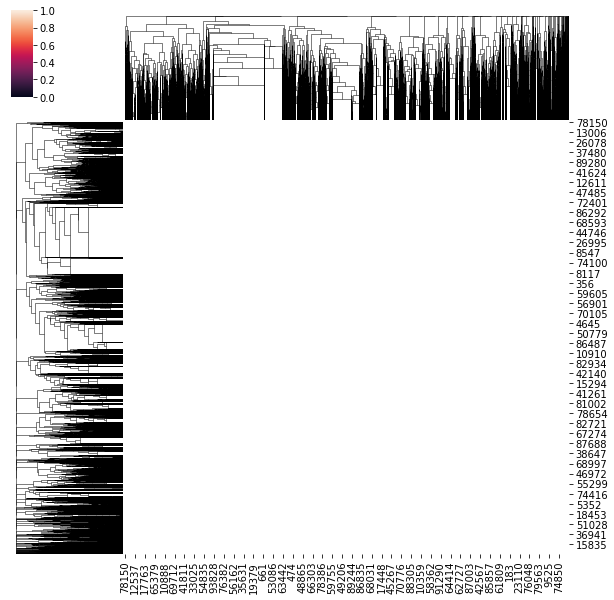

In [13]:
clustermap = sns.clustermap(similarity_matrix, row_linkage=hierarchical_cluster, col_linkage=hierarchical_cluster)

In [22]:
hierarchical_cluster.shape

(95457, 4)

In [25]:
hierarchical_cluster

array([[0.00000e+00, 1.10000e+01, 0.00000e+00, 2.00000e+00],
       [5.43400e+03, 5.09070e+04, 0.00000e+00, 2.00000e+00],
       [1.35920e+04, 2.58720e+04, 0.00000e+00, 2.00000e+00],
       ...,
       [1.90816e+05, 1.90911e+05, 1.00000e+00, 7.89800e+04],
       [1.90812e+05, 1.90912e+05, 1.00000e+00, 9.48290e+04],
       [1.90802e+05, 1.90913e+05, 1.00000e+00, 9.54580e+04]])

In [ ]:

    file_name = '/mnt/files/AgglomerativeClustering'+str(i)+'.out'
    np.savetxt(file_name, y_hc.n_clusters, fmt='%d')

In [25]:
pwd

'/home/ec2-user/googleplay-api'

In [ ]:
for i in range(5,310,5):
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'precomputed', linkage = 'complete')
    y_hc = hc.fit(X)
    file_name = '/mnt/files/AgglomerativeClustering'+str(i)+'.out'
    np.savetxt(file_name, y_hc.n_clusters, fmt='%d')